In [1]:
#importing important libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
#get the size of the dataset
df.shape

(5110, 12)

there are 5110 rows and 12 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


 id,hypertension,heart_disease and stroke are of integar type
gender,ever_married,work_type, residence_type and smoking_type are of object datatype
age,avg_glucose_level and bmi are of float datatype
Only bmi column has missing values

In [6]:
df.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


# Exploratory Data Analysis

<AxesSubplot:xlabel='stroke', ylabel='count'>

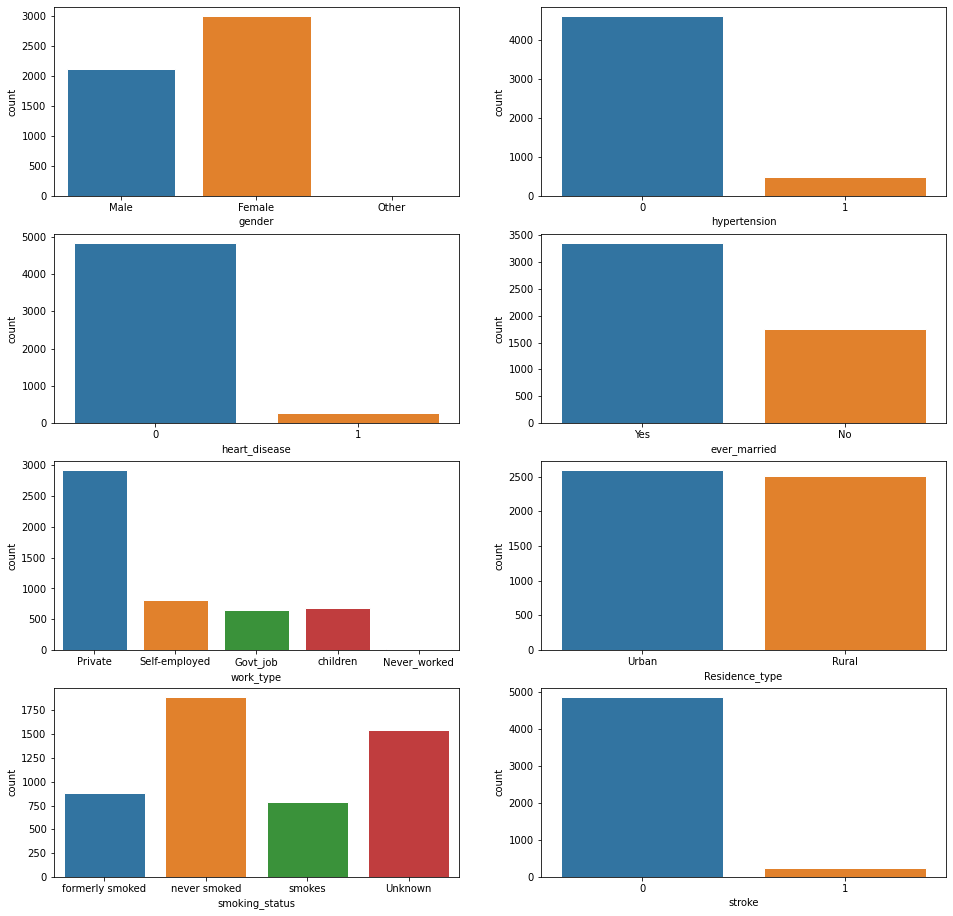

In [7]:
fig,axes = plt.subplots(4,2,figsize=(16,16))
sns.set_style('darkgrid')
sns.countplot(ax=axes[0,0],data=df,x='gender')
sns.countplot(ax=axes[0,1],data=df,x='hypertension')
sns.countplot(ax=axes[1,0],data=df,x='heart_disease')
sns.countplot(ax=axes[1,1],data=df,x='ever_married')
sns.countplot(ax=axes[2,0],data=df,x='work_type')
sns.countplot(ax=axes[2,1],data=df,x='Residence_type')
sns.countplot(ax=axes[3,0],data=df,x='smoking_status')
sns.countplot(ax=axes[3,1],data=df,x='stroke')

In [8]:
len(df[df.gender == 'Other'])

1

there is only one rows where gender is 'Other'. We can drop this row

In [9]:
df.drop(df[df['gender']=='Other'].index,inplace=True)

In [10]:
len(df[df['work_type']=='Never_worked'])

22

/home/masud-versu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke', ylabel='count'>

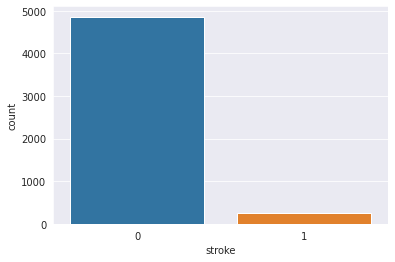

In [11]:
sns.countplot('stroke',data=df)

there are about 4700 data of patient who doesn't have stroke but there are only about 250 number of data of stroke patient
so data is highly imbalanced

/home/masud-versu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke', ylabel='count'>

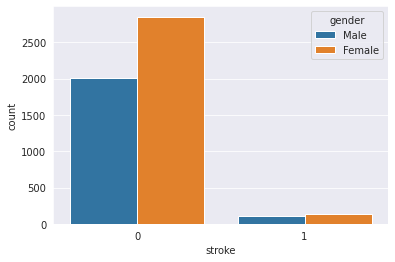

In [12]:
sns.countplot('stroke',hue='gender',data=df)

the number of male and female patient are almost same but female patient are little higher than male

<AxesSubplot:xlabel='gender', ylabel='count'>

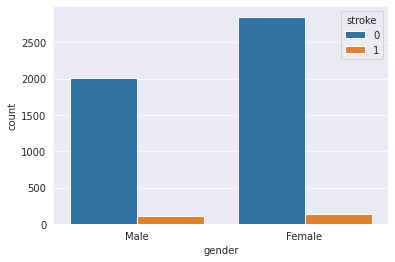

In [13]:
sns.countplot(hue='stroke',x='gender',data=df)

<AxesSubplot:xlabel='gender', ylabel='age'>

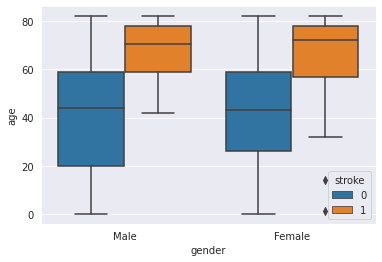

In [14]:
sns.boxplot(x='gender',y='age',data = df,hue = 'stroke')

people aged between 60 and 80 are in riskier postion of getting stroke than the younger people for both male and female

In [15]:
df.age.mode()

0    78.0
dtype: float64

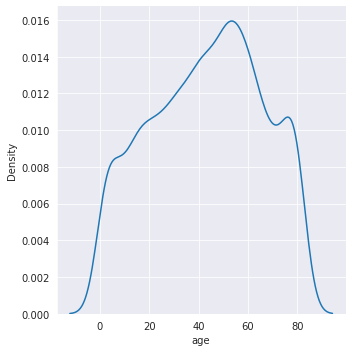

In [16]:
ax=sns.displot(df.age,kind='kde')

<AxesSubplot:>

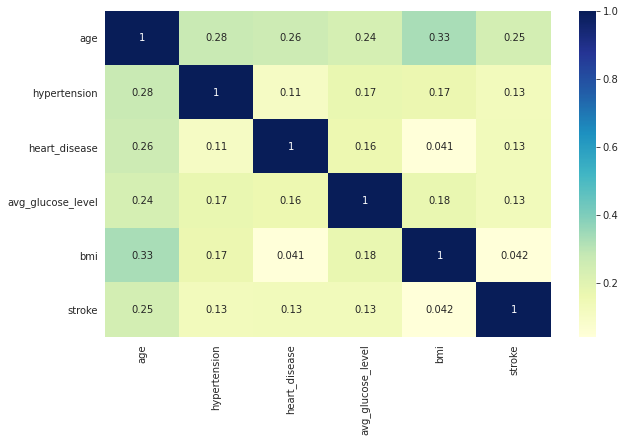

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df.drop(['id'],axis=1).corr(),cmap='YlGnBu',annot=True)

there is no noteworthy correlation between these features of the dataset

/home/masud-versu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ever_married', ylabel='count'>

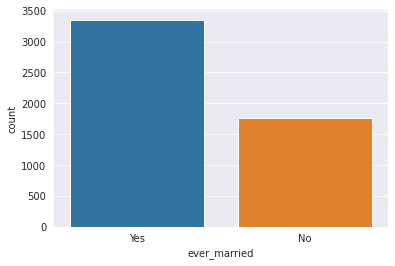

In [18]:
sns.countplot('ever_married',data=df)

there is more married people than unmarried in this dataset

/home/masud-versu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ever_married', ylabel='count'>

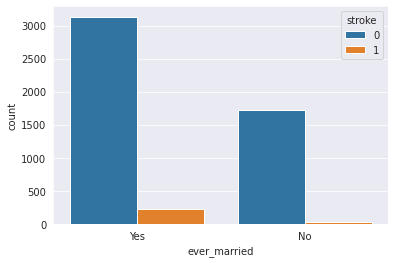

In [19]:
sns.countplot('ever_married',data=df,hue='stroke')

/home/masud-versu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='work_type', ylabel='count'>

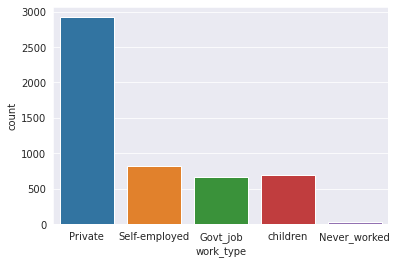

In [20]:
sns.countplot('work_type',data=df)

most of the people work in private company

/home/masud-versu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Residence_type', ylabel='count'>

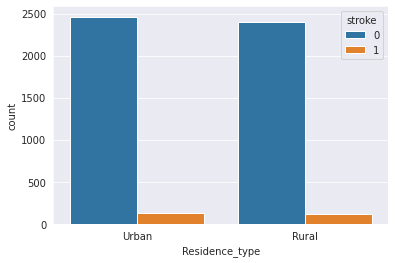

In [21]:
sns.countplot('Residence_type',data=df,hue='stroke')

/home/masud-versu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Residence_type', ylabel='count'>

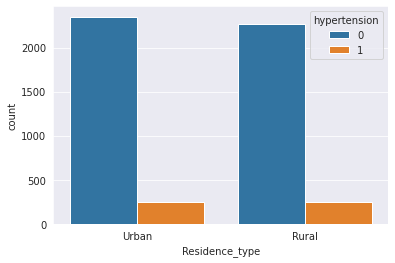

In [22]:
sns.countplot('Residence_type',data=df,hue='hypertension')

<AxesSubplot:xlabel='smoking_status', ylabel='avg_glucose_level'>

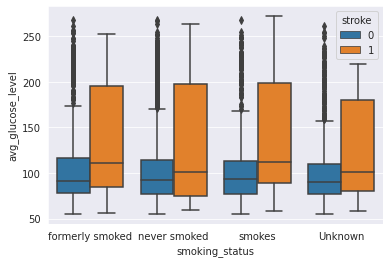

In [23]:
sns.boxplot(y='avg_glucose_level',x='smoking_status',data=df,hue='stroke')

there are a lot of outliers. we have to remove glucose level over  200

In [24]:
df.avg_glucose_level.replace(np.where(df.avg_glucose_level > 200, df.avg_glucose_level.median(), df.avg_glucose_level),inplace=True)

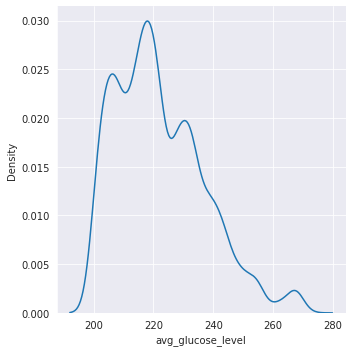

In [25]:
sns.displot(df.avg_glucose_level,kind='kde')

average glucose level distribution is right skewed

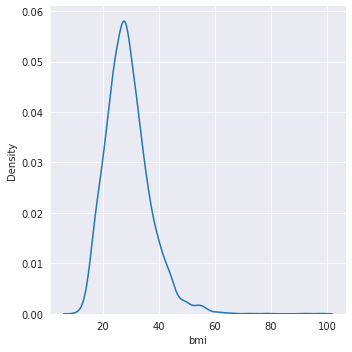

In [26]:
sns.displot(df.bmi,kind='kde')

bmi distribution is also right skewed. we will drop rows with bmi above 47

In [27]:
df.drop(df[df.bmi > 47].index,inplace=True)

/home/masud-versu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke', ylabel='avg_glucose_level'>

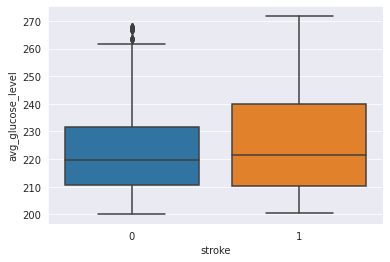

In [28]:
sns.boxplot('stroke','avg_glucose_level',data=df)

average glucose level is little higher for stroke patient

/home/masud-versu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoking_status', ylabel='count'>

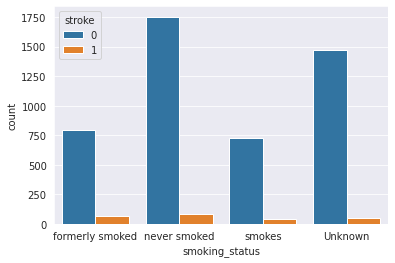

In [29]:
sns.countplot('smoking_status',data=df,hue='stroke')

/home/masud-versu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke', ylabel='bmi'>

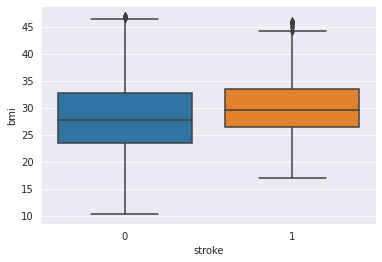

In [30]:
sns.boxplot('stroke','bmi',data=df)

/home/masud-versu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoking_status', ylabel='bmi'>

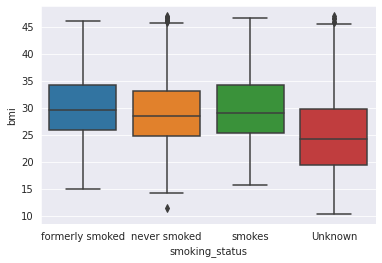

In [31]:
sns.boxplot('smoking_status','bmi',data=df)

/home/masud-versu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='heart_disease', ylabel='stroke'>

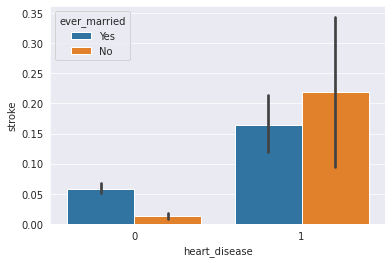

In [32]:
sns.barplot('heart_disease','stroke',hue='ever_married',data=df)

people with no heart disease and not married are less stroke rate but people who have heart disease and not married has more stroke

/home/masud-versu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke', ylabel='heart_disease'>

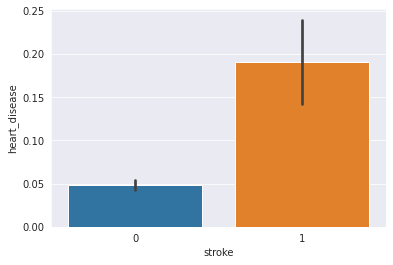

In [33]:
sns.barplot('stroke','heart_disease',data=df)

In [34]:
def married_heart_diseases(x):
    if (x['ever_married'] == 'Yes') & (x['heart_disease']==1):
        return 'married_heart_dis'
    elif (x['ever_married'] == 'No') & (x['heart_disease']==1):
        return 'not_married_heart_dis'
    elif (x['ever_married'] == 'Yes') & (x['heart_disease']==0):
        return 'married_no_heart_dis'
    else:
        return 'not_married_no_heart_dis'
df['married_heart_disease'] = df.apply(married_heart_diseases,axis=1)

/home/masud-versu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='married_heart_disease', ylabel='count'>

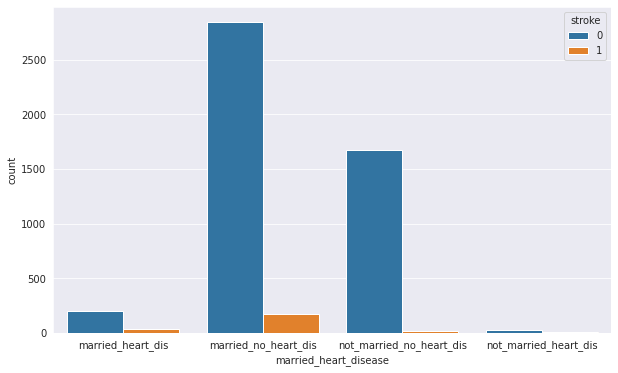

In [69]:
plt.figure(figsize=(10,6))
sns.countplot('married_heart_disease',data=df,hue='stroke')

In [35]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,married_heart_disease
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,married_heart_dis
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,married_no_heart_dis
2,31112,Male,80.0,0,1,Yes,Private,Rural,202.21,32.5,never smoked,1,married_heart_dis
3,60182,Female,49.0,0,0,Yes,Private,Urban,202.21,34.4,smokes,1,married_no_heart_dis
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,202.21,24.0,never smoked,1,married_no_heart_dis


we will plot some pie chart to have a better understanding

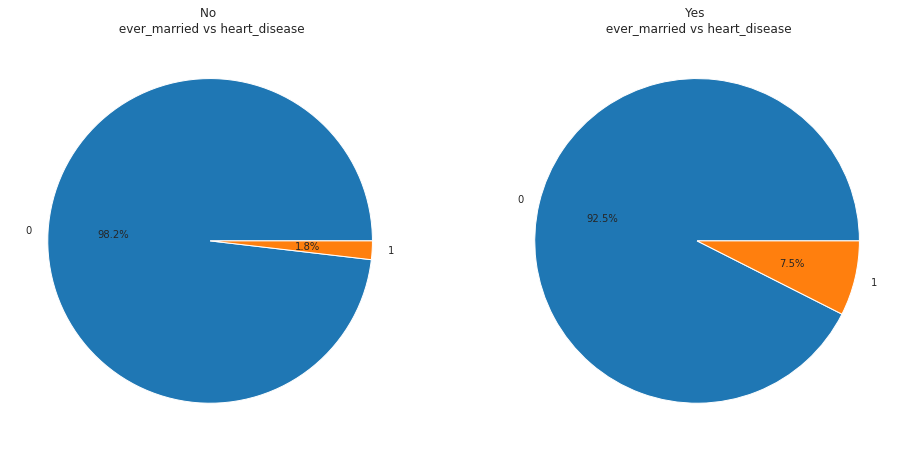

In [74]:
heart_marr = df.groupby('ever_married')['heart_disease'].value_counts()
indc = []
plt.figure(figsize=(16,9))
for i,j in heart_marr.index:
    indc.append(i)
heart_marr_indc = list(set(indc))
k= 1
for i in heart_marr_indc:
    plt.subplot(1,2,k)
    labels=heart_marr[i].index
    plt.pie(heart_marr[i],labels=labels,autopct='%1.1f%%')
    plt.title(f"{i} \n ever_married vs heart_disease")
    k=k+1

98.2% of those who never married don't have heart disease and 92.5% of those who married don't have disease

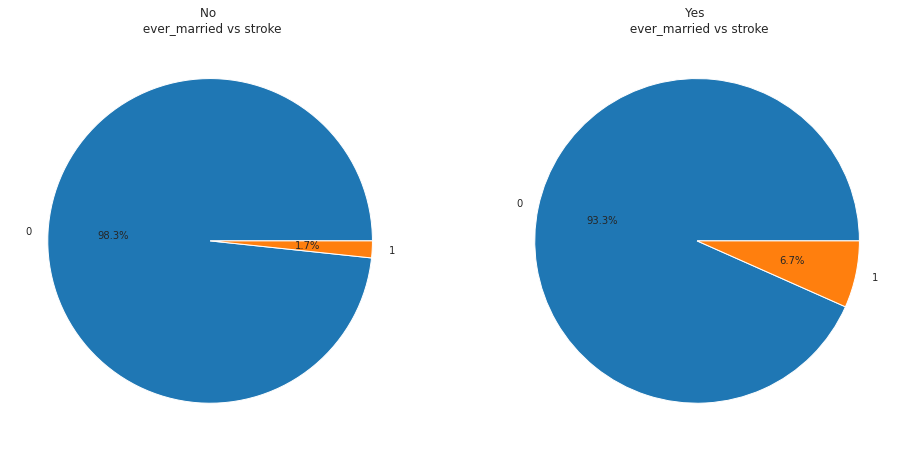

In [75]:
stroke_marr = df.groupby('ever_married')['stroke'].value_counts()
indc = []
plt.figure(figsize=(16,9))
for i,j in stroke_marr.index:
    indc.append(i)
stroke_marr_indc = list(set(indc))
k= 1
for i in stroke_marr_indc:
    plt.subplot(1,2,k)
    labels=stroke_marr[i].index
    plt.pie(stroke_marr[i],labels=labels,autopct='%1.1f%%')
    plt.title(f'{i} \n ever_married vs stroke')
    k=k+1

1.7% of those who never married have stroke and 6.7% of those who married have stroke
so married people have more chances of having stroke than single people

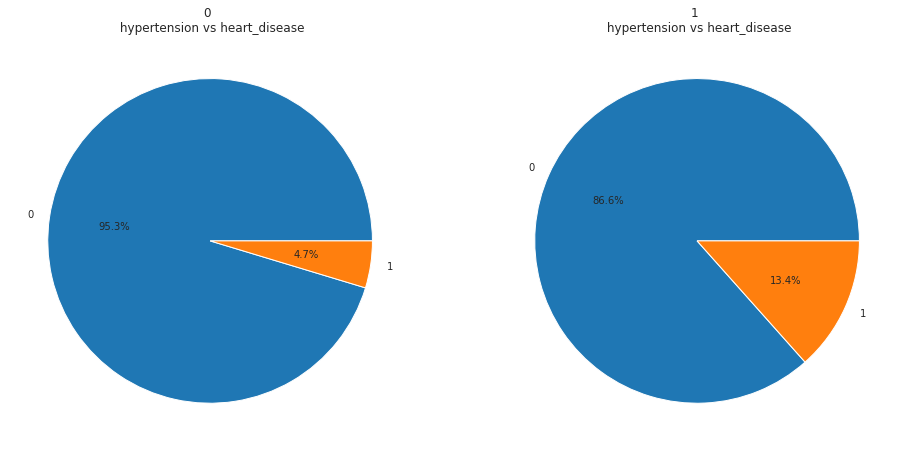

In [76]:
hyp_heart = df.groupby('hypertension')['heart_disease'].value_counts()
indc = []
plt.figure(figsize=(16,9))
for i,j in hyp_heart.index:
    indc.append(i)
hyp_heart_indc = list(set(indc))
k= 1
for i in hyp_heart_indc:
    plt.subplot(1,2,k)
    labels=hyp_heart[i].index
    plt.pie(hyp_heart[i],labels=labels,autopct='%1.1f%%')
    plt.title(f'{i} \n hypertension vs heart_disease')
    k=k+1

people who don't have hypertension but have heart_disease occupy 4.7% of the population while the perchantage is 13.4% for people who have both hypertension and heart_disease

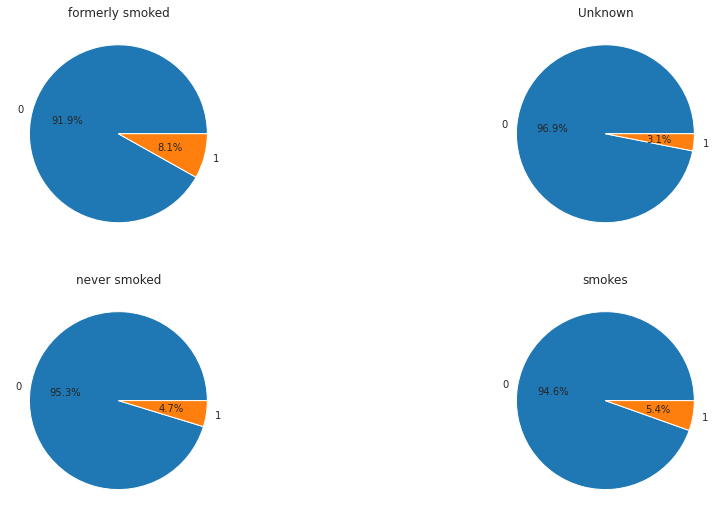

In [39]:
smoke_stroke = df.groupby('smoking_status')['stroke'].value_counts()
indc = []
plt.figure(figsize=(16,9))
for i,j in smoke_stroke.index:
    indc.append(i)
smoke_stroke_indc = list(set(indc))
k= 1
for i in smoke_stroke_indc:
    plt.subplot(2,2,k)
    labels=smoke_stroke[i].index
    plt.pie(smoke_stroke[i],labels=labels,autopct='%1.1f%%')
    plt.title(i)
    k=k+1

looking at the pie shows above, people who quit smoking have more chance of having stroke than other  

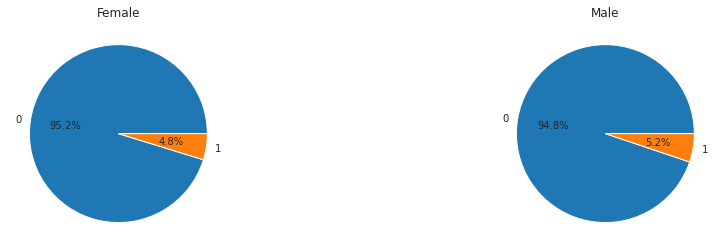

In [40]:
gender_stroke = df.groupby('gender')['stroke'].value_counts()
indc = []
plt.figure(figsize=(16,9))
for i,j in gender_stroke.index:
    indc.append(i)
gender_stroke_indc = list(set(indc))
k= 1
for i in gender_stroke_indc:
    plt.subplot(2,2,k)
    labels=gender_stroke[i].index
    plt.pie(gender_stroke[i],labels=labels,autopct='%1.1f%%')
    plt.title(i)
    k=k+1

male are comparetively have more chance of having stroke than female

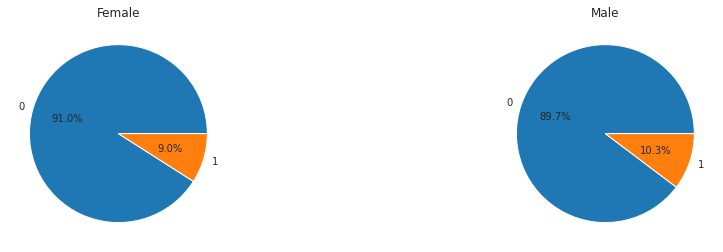

In [41]:
gender_hyp = df.groupby('gender')['hypertension'].value_counts()
indc = []
plt.figure(figsize=(16,9))
for i,j in gender_hyp.index:
    indc.append(i)
gender_hyp_indc = list(set(indc))
k= 1
for i in gender_hyp_indc:
    plt.subplot(2,2,k)
    labels=gender_hyp[i].index
    plt.pie(gender_hyp[i],labels=labels,autopct='%1.1f%%')
    plt.title(i)
    k=k+1

also male are more likely to have hypertension as compared to female

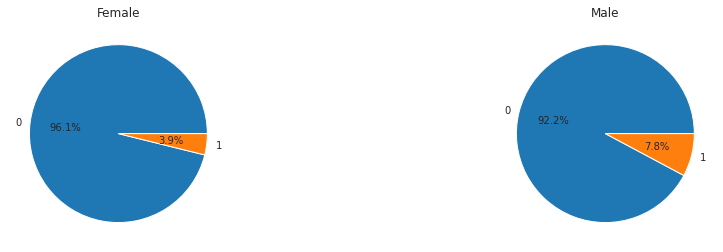

In [42]:
gender_heart = df.groupby('gender')['heart_disease'].value_counts()
indc = []
plt.figure(figsize=(16,9))
for i,j in gender_heart.index:
    indc.append(i)
gender_heart_indc = list(set(indc))
k= 1
for i in gender_heart_indc:
    plt.subplot(2,2,k)
    labels=gender_heart[i].index
    plt.pie(gender_heart[i],labels=labels,autopct='%1.1f%%')
    plt.title(i)
    k=k+1

chance of having heart disease is almost double for male than female

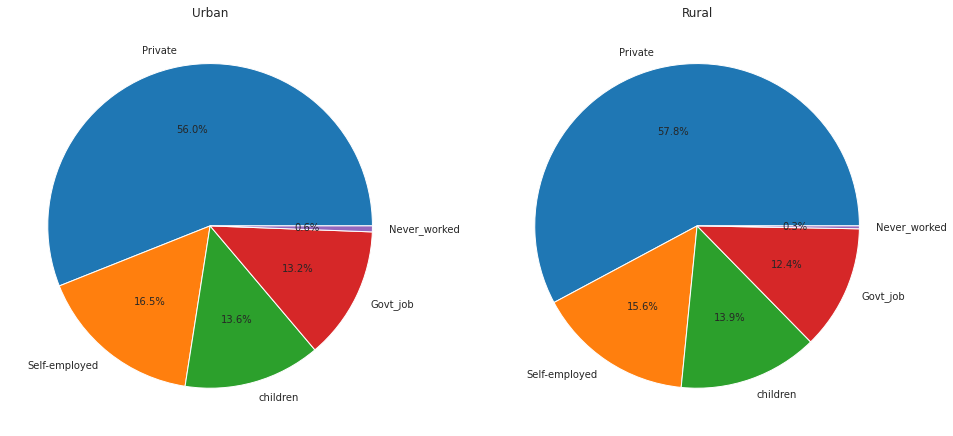

In [43]:
residence_work = df.groupby('Residence_type')['work_type'].value_counts()
indc = []
plt.figure(figsize=(16,9))
for i,j in residence_work.index:
    indc.append(i)
residence_work_indc = list(set(indc))
k= 1
for i in residence_work_indc:
    plt.subplot(1,2,k)
    labels=residence_work[i].index
    plt.pie(residence_work[i],labels=labels,autopct='%1.1f%%')
    plt.title(i)
    k=k+1

/home/masud-versu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='married_heart_disease', ylabel='count'>

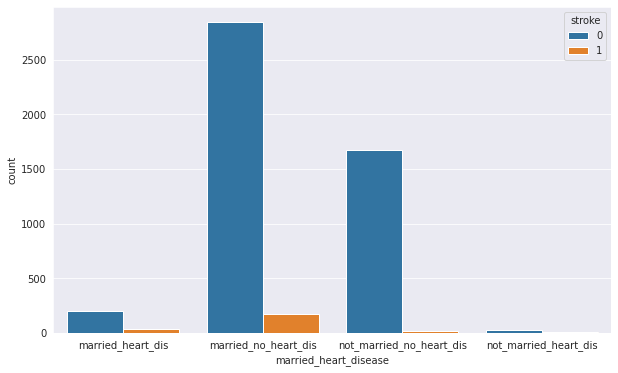

In [44]:
plt.figure(figsize=(10,6))
sns.countplot('married_heart_disease',hue='stroke',data=df)

In [45]:
plt.figure(figsize=(16,6))
marr_work = df.groupby('work_type')['ever_married'].value_counts()
#marr_work.index = ['govt_yes','govt_no','never_no','private_yes','private_no','self_yes','self_no','child_no']
indices = []
for i,j in marr_work.index:
    indices.append(i)

<Figure size 1152x432 with 0 Axes>

In [46]:
marr_work['Govt_job'].index

Index(['Yes', 'No'], dtype='object', name='ever_married')

In [47]:
indx = list(set(indices))

In [48]:
for i in indx:
    print(i[0])

N
G
P
c
S


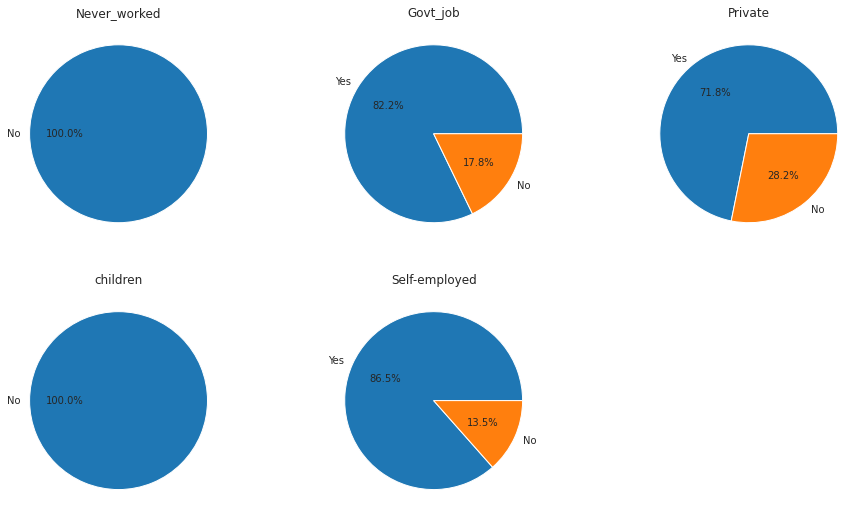

In [49]:
k=1
plt.figure(figsize=(16,9))
for i in indx:
    plt.subplot(2,3,k)
    labels = marr_work[i].index
    plt.pie(marr_work[i],labels=labels,autopct='%1.1f%%')
    plt.title(i)
    k=k+1

28.2% of the population who works in private sector are not married, it's 17.2% for govt job and 13.5% for self employed

<AxesSubplot:xlabel='avg_glucose_level', ylabel='bmi'>

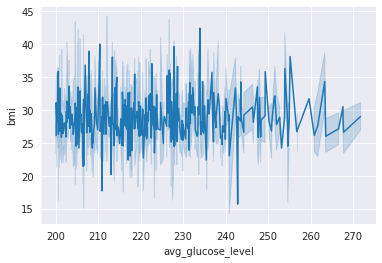

In [50]:
sns.lineplot(y='bmi',x='avg_glucose_level',data=df)

<AxesSubplot:xlabel='hypertension', ylabel='heart_disease'>

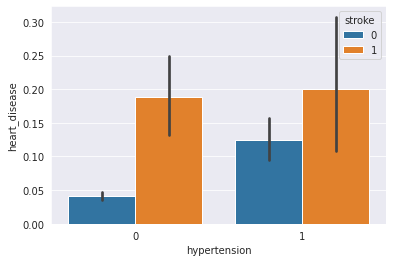

In [51]:
sns.barplot(x='hypertension',y='heart_disease',hue='stroke',data=df)

In [52]:
import missingno as msno

<AxesSubplot:>

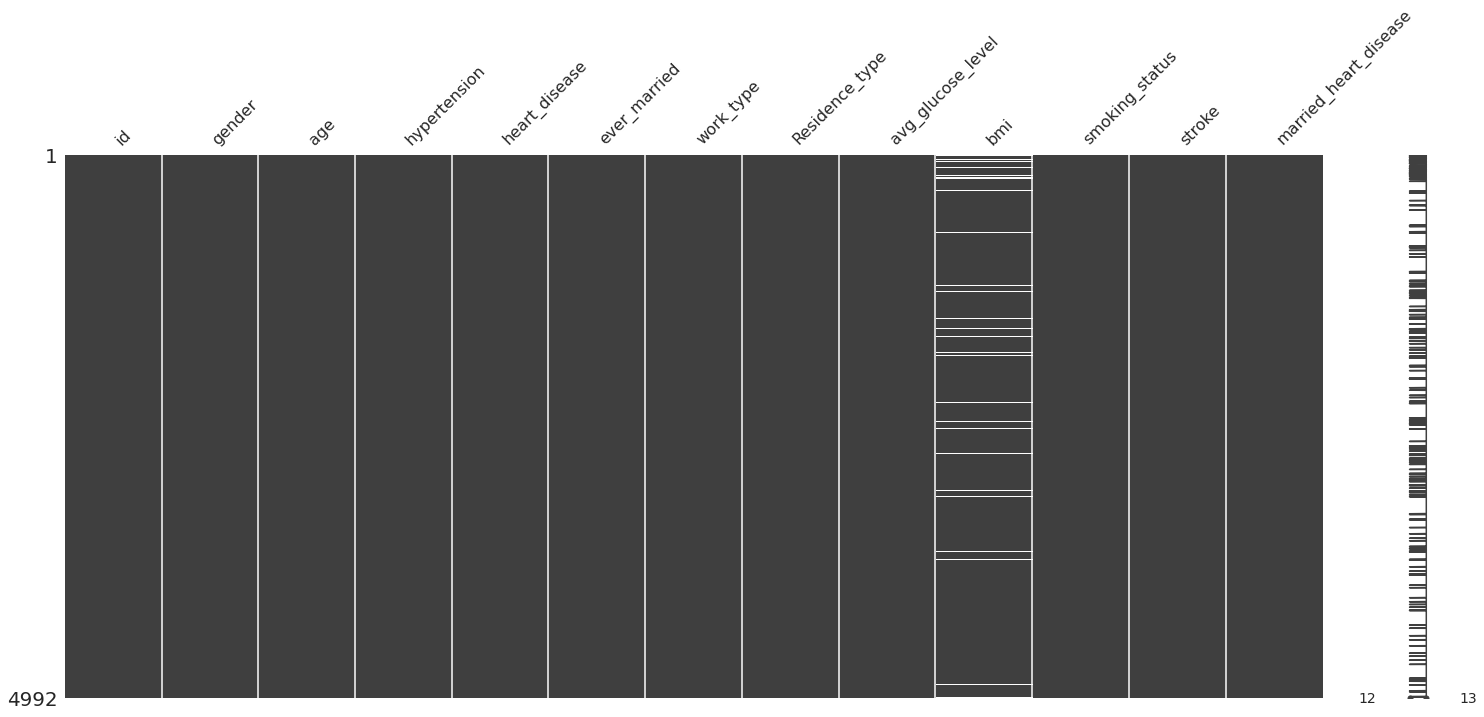

In [53]:
msno.matrix(df)

there are missing values in the column bmi we will fill this null with median values with fillna method

In [54]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,married_heart_disease
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,married_heart_dis
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,married_no_heart_dis
2,31112,Male,80.0,0,1,Yes,Private,Rural,202.21,32.5,never smoked,1,married_heart_dis
3,60182,Female,49.0,0,0,Yes,Private,Urban,202.21,34.4,smokes,1,married_no_heart_dis
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,202.21,24.0,never smoked,1,married_no_heart_dis


In [55]:
df.bmi.fillna(df.bmi.median(),inplace=True)

In [56]:
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                      0
smoking_status           0
stroke                   0
married_heart_disease    0
dtype: int64

now there is no missing values

In [57]:
df=df.drop(['id'],axis=1)

In [58]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'married_heart_disease'],
      dtype='object')

since machine learing model only works with numbers, we will convert object columns into integar by pandas get_dummies method

In [59]:
df1=pd.get_dummies(df,drop_first=True)

In [60]:
df1.shape

(4992, 19)

as we saw earlier, dataset is highly imbalanced. there were less data for people who have stroke, so we will balance the dataset by oversampling method

In [61]:
from imblearn.over_sampling import SMOTE

In [63]:
sample = SMOTE(random_state=42)
X= df1.drop(['stroke'],axis=1)
y=df1['stroke']
X,y = sample.fit_resample(X,y)

/home/masud-versu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke', ylabel='count'>

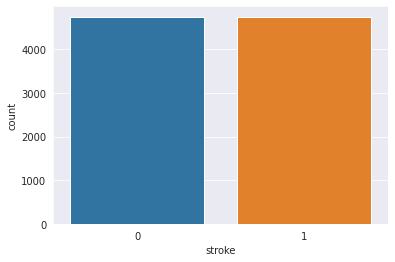

In [64]:
sns.countplot(y)

perfectly balanced. as everything should be

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

we will try all these model as imported above and check which one perfoms best

In [78]:
sc = {}
name = ['randomforest','decisontree','svc','logistic','KNeighborsClassifier']
model = [RandomForestClassifier(),DecisionTreeClassifier(),SVC(),LogisticRegression(max_iter=1000),KNeighborsClassifier()]
for i,j in zip(model,name):
    sc[j]=cross_val_score(i,X,y,cv=5)

In [79]:
sc

{'randomforest': array([0.89310163, 0.97367035, 0.96575342, 0.97734457, 0.971549  ]),
 'decisontree': array([0.88151659, 0.94260137, 0.92781876, 0.93993678, 0.93466807]),
 'svc': array([0.77198526, 0.77935756, 0.76659642, 0.77291886, 0.78134879]),
 'logistic': array([0.82043181, 0.8957346 , 0.89199157, 0.89199157, 0.88672287]),
 'KNeighborsClassifier': array([0.89942075, 0.89204845, 0.87355111, 0.88988409, 0.89936776])}

rainforest performed better than any other model with score range between 89% and 97%. so we will 

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y)

In [ ]:
x_train.shape

In [ ]:
x_test.shape

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)


In [ ]:
rf.score(x_test,y_test)

In [ ]:
y_pred = rf.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))